In [65]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [66]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

In [67]:
# Minimal Preprocessing steps
# removing the 'dteday'  and 'instant' feature
train_df = train_df.drop('dteday', axis=1).drop('instant', axis=1)
test_df = test_df.drop('dteday', axis=1).drop('instant', axis=1)

In [68]:
# Replacing all MissingValues with the most frequent values
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_df[:] = imp_most_freq.fit_transform(train_df)
test_df[:] = imp_most_freq.fit_transform(test_df)

C:\Users\Akira\AppData\Local\Temp\ipykernel_9700\2020034284.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_df[:] = imp_most_freq.fit_transform(train_df)
C:\Users\Akira\AppData\Local\Temp\ipykernel_9700\2020034284.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_df[:] = imp_most_freq.fit_transform(test_df)


In [69]:
# Splitting the train data into features and labels
train_features = train_df.iloc[:, :13]
train_labels = train_df.iloc[:, -1:]

# Splitting the test data into features and labels
test_features = test_df.iloc[:, :13]
test_labels = test_df.iloc[:, -1:]

In [79]:
train_features
train_labels

test_features
test_labels

,cnt
0,3894.0
1,5936.0
2,5629.0
3,3310.0
4,4748.0
...,...
127,4990.0
128,5687.0
129,3907.0
130,5225.0


<Axes: >

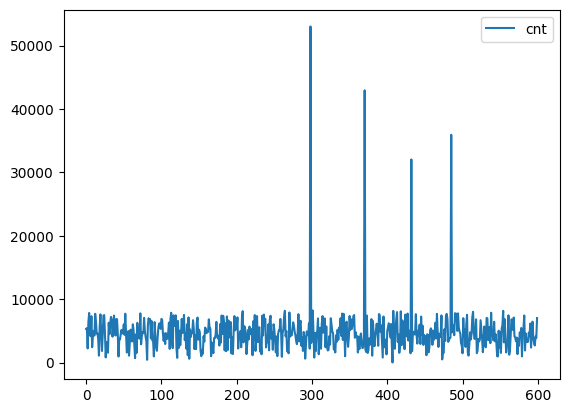

In [80]:
train_labels.plot()

<Axes: >

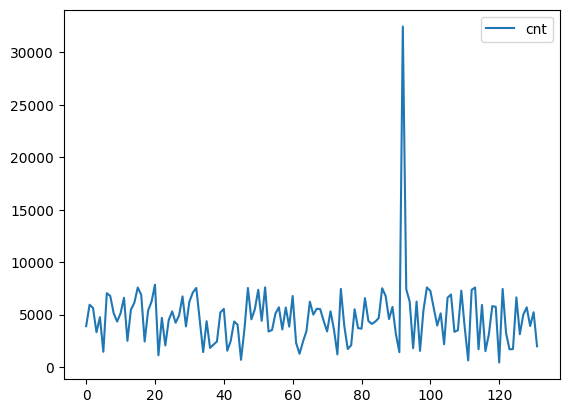

In [71]:
test_labels.plot()

In [72]:
# Model building
# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
reg_model_before_pp = linear_model.LinearRegression()

reg_model_before_pp.fit(train_features, train_labels)

print(reg_model_before_pp.coef_)

[[ 3.14720871e+02  2.45003617e+03  3.48270214e+01 -1.02268918e+03
   1.85177086e+02 -4.75957122e+02 -7.66348093e+02 -1.16757400e+01
   7.76810092e+03 -6.60174333e+00 -6.54686788e+02  8.65992328e-01
   2.62214091e+02]]


In [82]:
# Predict all test examples
ypred = reg_model_before_pp.predict(test_features)
ypred

numpy.ndarray

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

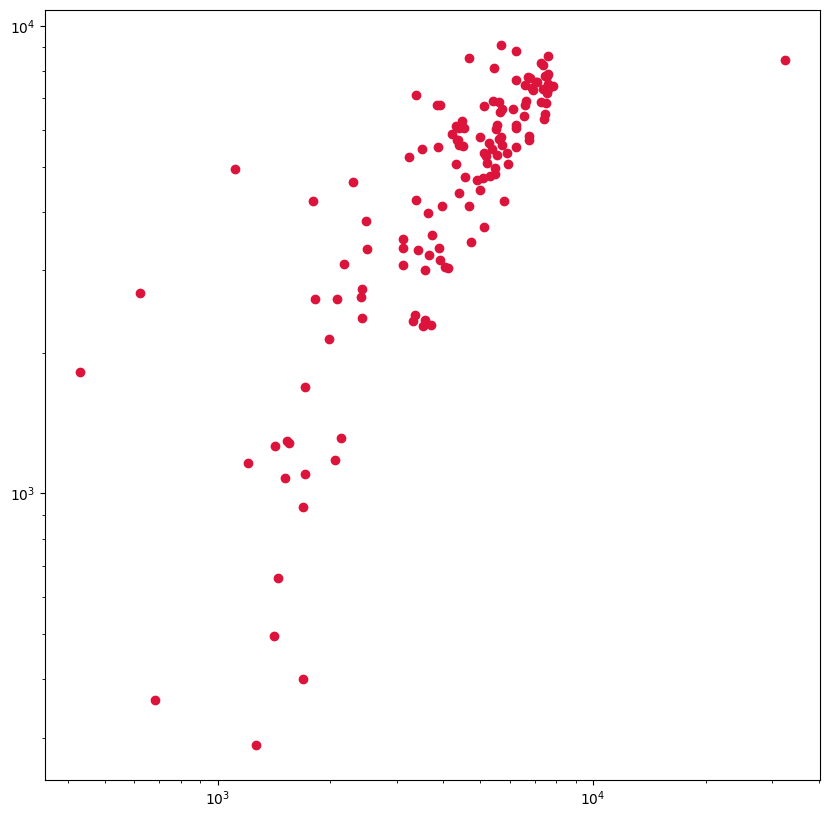

In [76]:
plt.figure(figsize=(10,10))
plt.scatter(test_labels, ypred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(ypred), max(test_labels))
p2 = min(min(ypred), min(test_labels))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = reg_model_before_pp.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - test_labels.iloc[0])

Predict label for following example:
season               4.000000
yr                   0.000000
mnth                10.000000
holiday              0.000000
weekday              3.000000
workingday           1.000000
weathersit           2.000000
temp                19.366700
atemp                0.472846
hum                108.062550
windspeed            0.148642
leaflets           605.000000
price reduction      0.000000
Name: 0, dtype: float64

Predicted label:  [3353.98310551]
Actual label: cnt    3894.0
Name: 0, dtype: float64
Deviation predicted from actual value:  cnt   -540.016894
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(round(ypred[:10] - test_labels.iloc[0:10])*100000, 2)

           cnt
0  -54000000.0
1  -87100000.0
2  123700000.0
3  -97500000.0
4 -129300000.0
5  -79100000.0
6   53800000.0
7  -96500000.0
8  163900000.0
9  179100000.0 2


In [ ]:
# Evaluate model

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg_model_before_pp.score(test_features, test_labels))

MAE: 1070.073
R^2 value of the model:  0.39686633532624505
